In [2]:
from datetime import date

import pandas as pd
import seaborn as sns

In [3]:
# decide the date range for the data, lets do two years
from_date = "2022-07-11"
to_date = "2024-07-11"

In [4]:
day_ahead_price = pd.read_csv("../data/processed/day_ahead_price.csv", decimal=",")
day_ahead_price = day_ahead_price[day_ahead_price["date"].between(from_date, to_date)]
day_ahead_price.reset_index(drop=True, inplace=True)
day_ahead_price.reset_index(inplace=True)

In [5]:
day_ahead_price[day_ahead_price["price"].isna()]

,index,date,hour,price


In [6]:
day_ahead_price.tail()

,index,date,hour,price
17563,17563,2024-07-11,19,120.00
17564,17564,2024-07-11,20,184.33
17565,17565,2024-07-11,21,166.74
17566,17566,2024-07-11,22,121.59
17567,17567,2024-07-11,23,98.12


<Axes: xlabel='index', ylabel='price'>

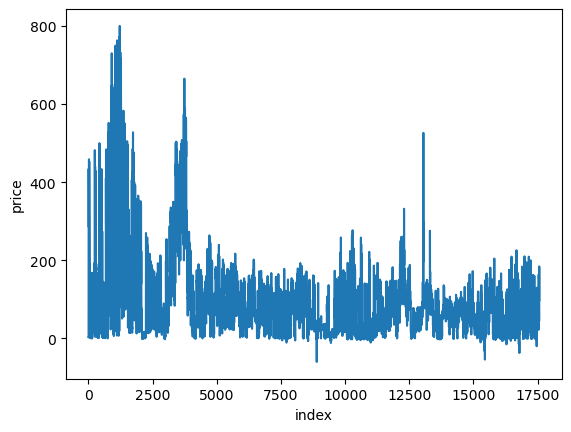

In [7]:
sns.lineplot(data=day_ahead_price, x="index", y="price")

<Axes: xlabel='index', ylabel='price'>

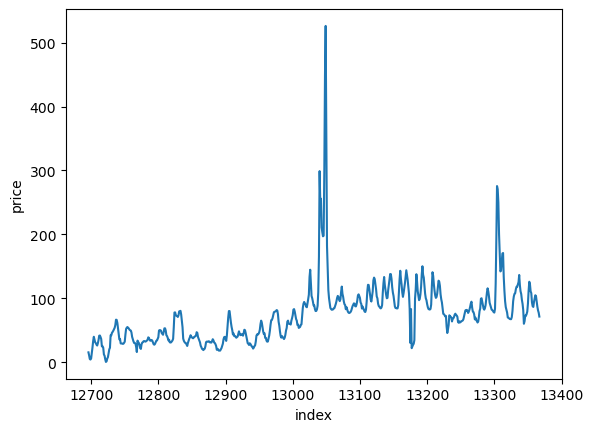

In [8]:
# We see a couple of spikes in price in this date interval. A quick look online at hourly
# temperatures in southern Sweden at these dates shows some extremely low temperatures roughly
# around the spikes. This supports the idea that temperature forecasts is a good predictor of
# electricity prices. We shall see during the modelling evaluation phase if this is true.
sns.lineplot(data=day_ahead_price[day_ahead_price["date"].between("2023-12-22", "2024-01-18")], x="index", y="price")

In [9]:
temperature = pd.read_csv("../data/processed/temperature.csv", decimal=",")
temperature = temperature[temperature["date"].between(from_date, to_date)]
temperature.reset_index(drop=True, inplace=True)
temperature.reset_index(inplace=True)

In [10]:
temperature.tail()

,index,date,hour,temperature
17563,17563,2024-07-11,19,19.6
17564,17564,2024-07-11,20,19.2
17565,17565,2024-07-11,21,18.4
17566,17566,2024-07-11,22,17.3
17567,17567,2024-07-11,23,16.4


In [11]:
temperature[temperature["temperature"].isna()]

,index,date,hour,temperature


<Axes: xlabel='index', ylabel='temperature'>

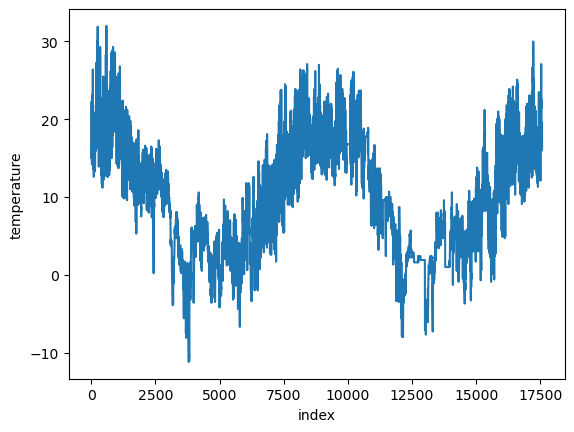

In [12]:
sns.lineplot(data=temperature, x="index", y="temperature")

<Axes: xlabel='index', ylabel='temperature'>

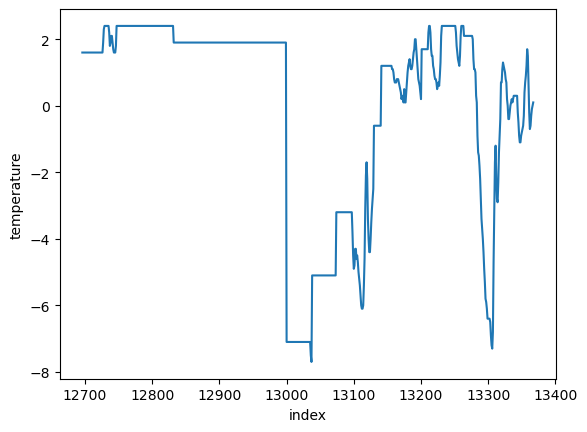

In [13]:
sns.lineplot(data=temperature[temperature["date"].between("2023-12-22", "2024-01-18")], x="index", y="temperature")

In [14]:
len(day_ahead_price) == len(temperature)

True